In [12]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [13]:
foldername = "../../results_all/micro_bootstrapping_influx"

In [14]:
variances = []

In [15]:

all_files = glob.glob(foldername + "/*")
for file in all_files:
    # Check if it's a csv file
    if (str(file).endswith(".csv")):

        df_results = pd.read_csv(file, sep=";", usecols=['number','medianPerfChange',
                                                         'minSmall', 'maxSmall',
                                                         "minMedium", "maxMedium",
                                                         "minLarge", "maxLarge"], index_col="number")

        nameparts=str(file).split("\\")
        name = nameparts[1]
        name = name[:-4]

        print(f"Find Variance for {name}")
        for index, row in df_results.iterrows():
            min = row["minSmall"]
            max = row["maxSmall"]
            var = max - min
            type = "< 1%"
            if var > 1:
                type = "1% - 3%"
                if var > 3:
                    type = "3% - 5%"
                    if var > 5:
                        type = "5% - 10%"
                        if var > 10:
                            type = "> 10%"


            variances.append({
                "name" : name,
                "var" : var,
                "volatility": type

            })


        print(f"Plotting benchmark {name}")
        #Find % set y-limits
        min = -5
        max = 5
        for minSmall in df_results.minSmall.unique():
            if minSmall < min:
                min = minSmall

        for maxSmall in df_results.maxSmall.unique():
            if maxSmall > max:
                max = maxSmall


        sns.set(style="whitegrid")
        axes = plt.axes()
        axes.set_ylim([min, max])

        plot = sns.lineplot(data=df_results, x="number", y="medianPerfChange", color="red")
        plot = sns.lineplot(data=df_results, x="number", y="minSmall", color="lightblue")
        plot = sns.lineplot(data=df_results, x="number", y="maxSmall", color="lightblue")
        plot = sns.lineplot(data=df_results, x="number", y="minMedium", color="dodgerblue")
        plot = sns.lineplot(data=df_results, x="number", y="maxMedium", color="dodgerblue")
        plot = sns.lineplot(data=df_results, x="number", y="minLarge", color="royalblue")
        plot = sns.lineplot(data=df_results, x="number", y="maxLarge", color="royalblue")
        plot.set(ylim=(min, max))
        plt.savefig(f'{foldername}/plots/{name}.png')
        plt.clf()

Find Variance for BenchmarkAppendUnescaped-2
Plotting benchmark BenchmarkAppendUnescaped-2
Find Variance for BenchmarkBooleanArrayDecodeAll-1-2
Plotting benchmark BenchmarkBooleanArrayDecodeAll-1-2
Find Variance for BenchmarkBooleanArrayDecodeAll-1000-2
Plotting benchmark BenchmarkBooleanArrayDecodeAll-1000-2
Find Variance for BenchmarkBooleanArrayDecodeAll-55-2
Plotting benchmark BenchmarkBooleanArrayDecodeAll-55-2
Find Variance for BenchmarkBooleanArrayDecodeAll-555-2
Plotting benchmark BenchmarkBooleanArrayDecodeAll-555-2
Find Variance for BenchmarkBooleanDecoder_DecodeAll-1-2
Plotting benchmark BenchmarkBooleanDecoder_DecodeAll-1-2
Find Variance for BenchmarkBooleanDecoder_DecodeAll-1000-2
Plotting benchmark BenchmarkBooleanDecoder_DecodeAll-1000-2
Find Variance for BenchmarkBooleanDecoder_DecodeAll-55-2
Plotting benchmark BenchmarkBooleanDecoder_DecodeAll-55-2
Find Variance for BenchmarkBooleanDecoder_DecodeAll-555-2
Plotting benchmark BenchmarkBooleanDecoder_DecodeAll-555-2
Find 

<Figure size 432x288 with 0 Axes>

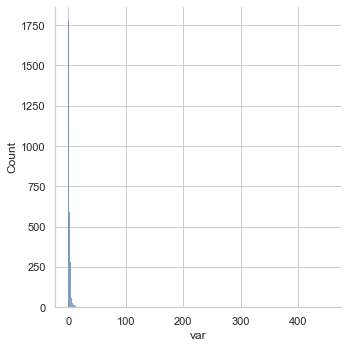

In [16]:
df_vars = pd.DataFrame(variances)
#sns.displot(df_vars, x="var", bins=[5,10,15,20,30,40,50,60,70,80,90,100,110,120,130,140,150])
sns.displot(df_vars, x="var", binwidth=1)


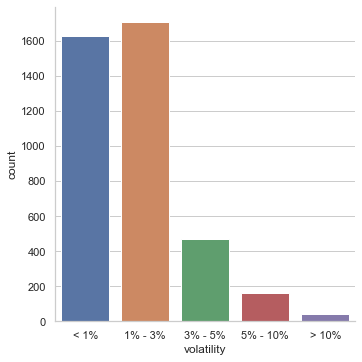

In [17]:
sns.catplot(x="volatility", kind="count", data=df_vars, order=["< 1%","1% - 3%","3% - 5%", "5% - 10%","> 10%"])